In [94]:
import pandas as pd

In [95]:

data = pd.read_csv("C:\\Users\\Ahile\\Downloads\\data.csv (2).csv")
data = pd.read_csv(r"C:\Users\Ahile\Downloads\hand-gesture-recognition-mediapipe-main\hand-gesture-recognition-mediapipe-main\filtered_data.csv", usecols=lambda column: column != 'Unnamed: 0')


In [96]:
print(data.head())
print(data.info())
print(data.describe())

         Date  MyWay  Paper Ticket
0  2023-04-01  23147          3027
1  2023-04-02  17043          2187
2  2023-04-03  63842          6507
3  2023-04-04  68322          6687
4  2023-04-05  67852          6742
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          396 non-null    object
 1   MyWay         396 non-null    int64 
 2   Paper Ticket  396 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.4+ KB
None
              MyWay  Paper Ticket
count    396.000000    396.000000
mean   48324.664141   4789.712121
std    21774.787575   2541.356289
min     2345.000000    373.000000
25%    23246.250000   2592.000000
50%    56824.000000   4770.000000
75%    66537.750000   6900.500000
max    79279.000000  10154.000000


In [124]:
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
start_date = pd.to_datetime('2023-04-01', format='%Y-%m-%d')
end_date = pd.to_datetime('2023-04-30', format='%Y-%m-%d')
filtered_data = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]
print("Data for the period from 1st April 2023 to 30th April 2024:")
filtered_data = filtered_data.sort_values('Date')
print(filtered_data)
filtered_data.to_csv('filtered___data.csv', index=False)

Data for the period from 1st April 2023 to 30th April 2024:
         Date  MyWay  Paper Ticket  Total Boardings
0  2023-04-01  23147          3027            26174
1  2023-04-02  17043          2187            19230
2  2023-04-03  63842          6507            70349
3  2023-04-04  68322          6687            75009
4  2023-04-05  67852          6742            74594
5  2023-04-06  63379          6894            70273
6  2023-04-07   8263          1215             9478
7  2023-04-08  18781          2608            21389
8  2023-04-09  13735          1752            15487
9  2023-04-10  15215          1930            17145
10 2023-04-11  50246          4306            54552
11 2023-04-12  48312          4536            52848
12 2023-04-13  49866          4665            54531
13 2023-04-14  48320          4872            53192
14 2023-04-15  21816          2853            24669
15 2023-04-16  14267          1900            16167
16 2023-04-17  49376          4478            53854
17 2

In [102]:


mean_value = df.mean()

median_value = df.median()

mode_value = df.mode().iloc[0]  
print("Mean:")
print(mean_value)
print("\nMedian:")
print(median_value)
print("\nMode:")
print(mode_value)


Mean:
Date            2023-10-15 12:00:00
MyWay                  48324.664141
Paper Ticket            4789.712121
dtype: object

Median:
Date            2023-10-15 12:00:00
MyWay                       56824.0
Paper Ticket                 4770.0
dtype: object

Mode:
Date            2023-04-01 00:00:00
MyWay                       66278.0
Paper Ticket                  532.0
Name: 0, dtype: object


In [103]:
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'])


filtered_data = filtered_data.sort_values('Date')

Q1 = filtered_data['MyWay'].quantile(0.25)
Q3 = filtered_data['MyWay'].quantile(0.75)


IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = filtered_data[(filtered_data['MyWay'] < lower_bound) | (filtered_data['MyWay'] > upper_bound)]

print("Interquartile Range (IQR):", IQR)
print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Outliers:")
print(outliers)

Interquartile Range (IQR): 36225.75
Lower Bound for Outliers: -36300.125
Upper Bound for Outliers: 108602.875
Outliers:
Empty DataFrame
Columns: [Date, MyWay, Paper Ticket]
Index: []


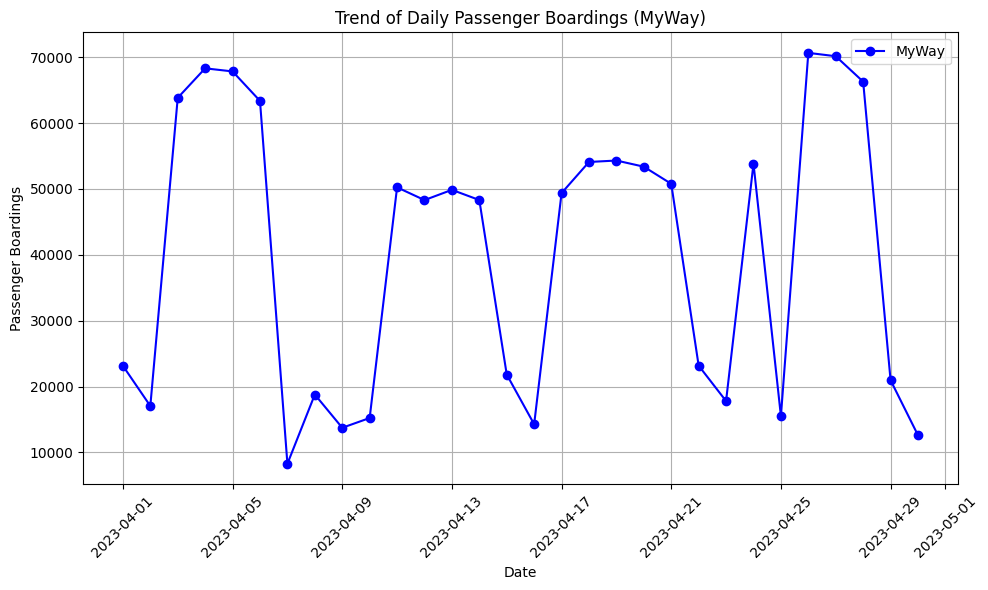

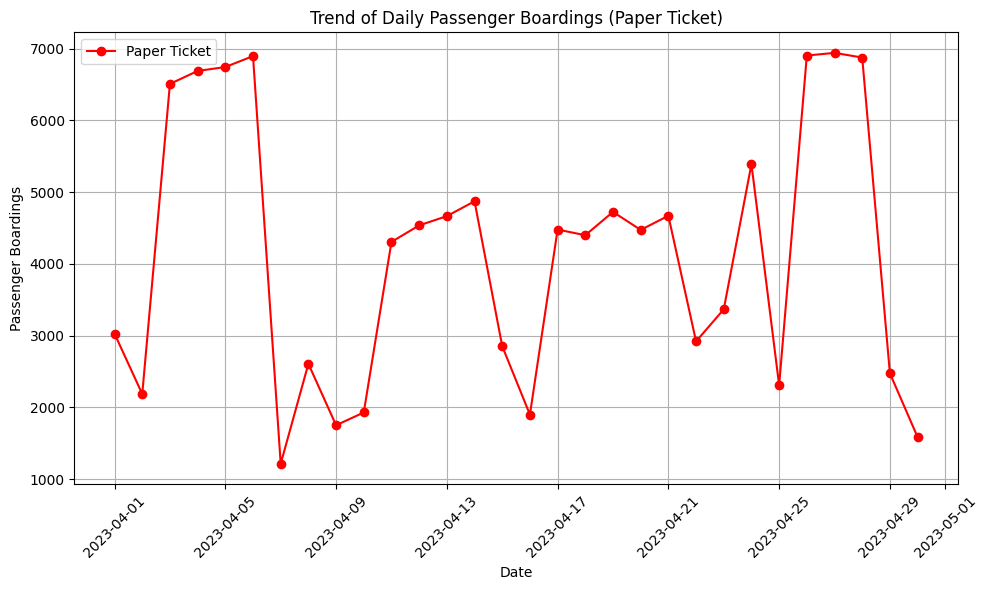

In [104]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['MyWay'], marker='o', color='b', label='MyWay')
plt.title('Trend of Daily Passenger Boardings (MyWay)')
plt.xlabel('Date')
plt.ylabel('Passenger Boardings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Date'], filtered_data['Paper Ticket'], marker='o', color='r', label='Paper Ticket')
plt.title('Trend of Daily Passenger Boardings (Paper Ticket)')
plt.xlabel('Date')
plt.ylabel('Passenger Boardings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Top 5 Peak Days for Passenger Boardings:
         Date  Total Boardings
25 2023-04-26            77570
26 2023-04-27            77099
3  2023-04-04            75009
4  2023-04-05            74594
27 2023-04-28            73173


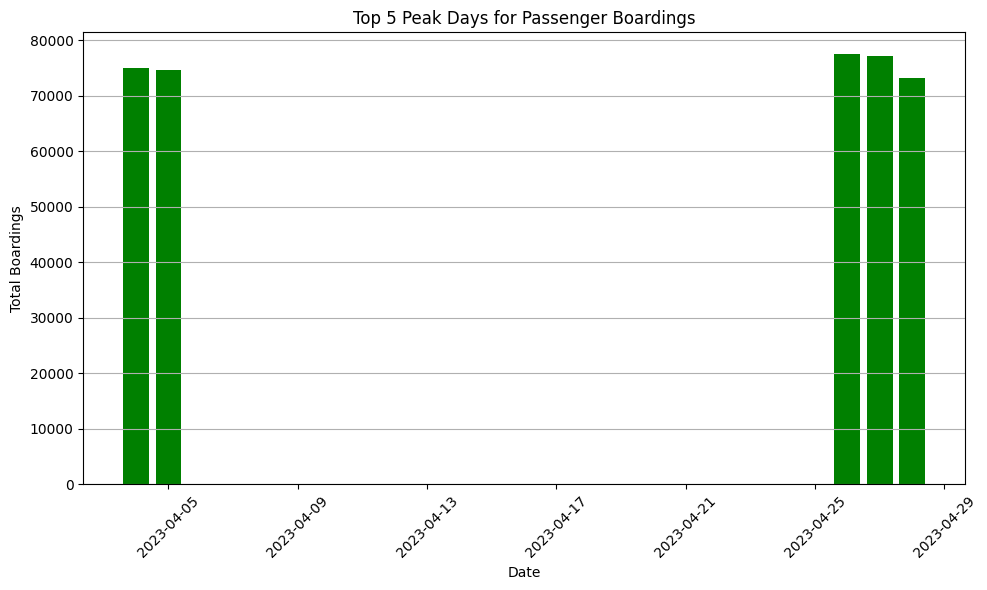

In [105]:

filtered_data['Total Boardings'] = filtered_data['MyWay'] + filtered_data['Paper Ticket']


peak_days = filtered_data.nlargest(5, 'Total Boardings')


print("Top 5 Peak Days for Passenger Boardings:")
print(peak_days[['Date', 'Total Boardings']])

plt.figure(figsize=(10, 6))
plt.bar(peak_days['Date'], peak_days['Total Boardings'], color='g')
plt.title('Top 5 Peak Days for Passenger Boardings')
plt.xlabel('Date')
plt.ylabel('Total Boardings')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


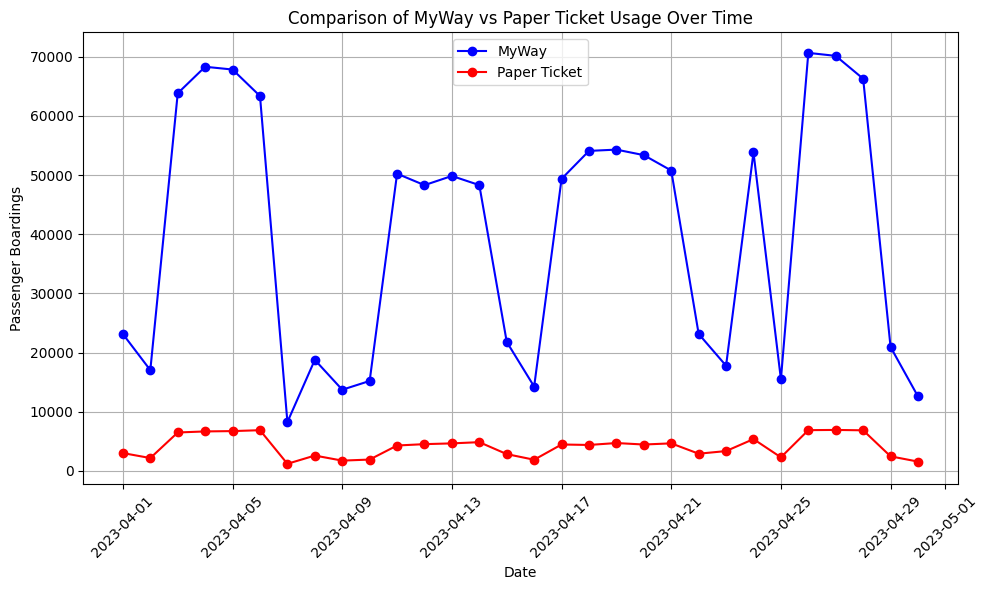

In [107]:

plt.figure(figsize=(10, 6))
plt.plot(filtered_data.Date, filtered_data['MyWay'], marker='o', color='b', label='MyWay')
plt.plot(filtered_data.Date, filtered_data['Paper Ticket'], marker='o', color='r', label='Paper Ticket')
plt.title('Comparison of MyWay vs Paper Ticket Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Passenger Boardings')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Summary Statistics:
              MyWay  Paper Ticket
count     30.000000     30.000000
mean   40178.700000   4139.566667
std    21662.719293   1864.342071
min     8263.000000   1215.000000
25%    18038.500000   2508.250000
50%    48848.000000   4436.000000
75%    54264.250000   5259.750000
max    70668.000000   6939.000000


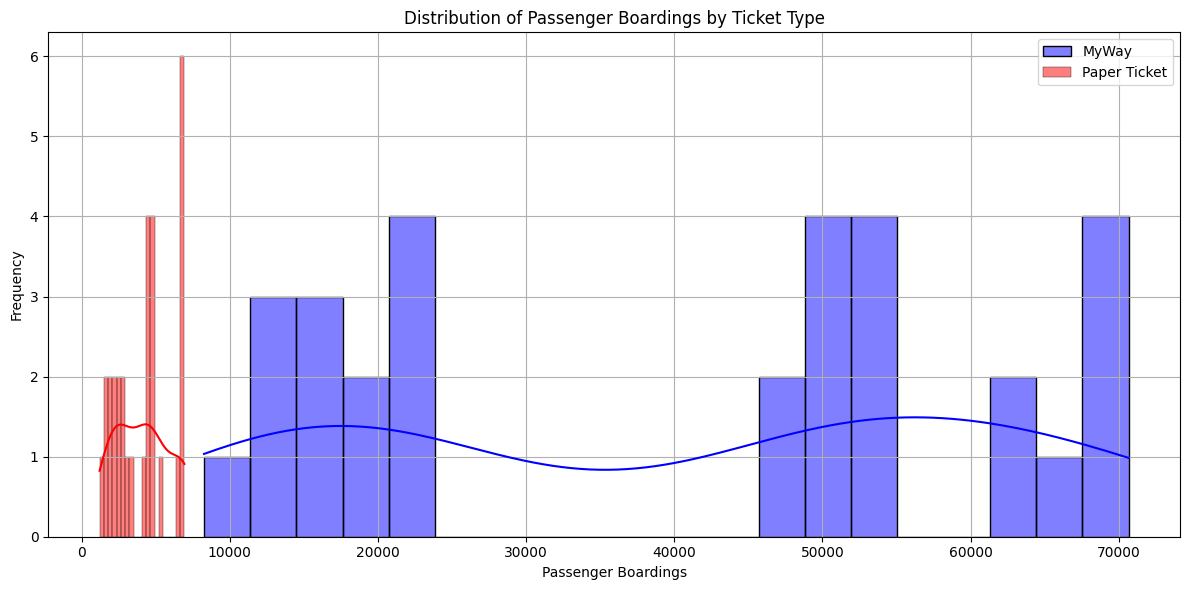


Correlation Matrix:
                 MyWay  Paper Ticket
MyWay         1.000000      0.970836
Paper Ticket  0.970836      1.000000


In [108]:
import seaborn as sns

summary_stats = filtered_data[['MyWay', 'Paper Ticket']].describe()
print("Summary Statistics:")
print(summary_stats)

plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x='MyWay', bins=20, color='b', kde=True, label='MyWay')
sns.histplot(data=filtered_data, x='Paper Ticket', bins=20, color='r', kde=True, label='Paper Ticket')
plt.title('Distribution of Passenger Boardings by Ticket Type')
plt.xlabel('Passenger Boardings')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

correlation = filtered_data[['MyWay', 'Paper Ticket']].corr()
print("\nCorrelation Matrix:")
print(correlation)


In [110]:
import itertools
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

p_values = range(0, 3)  
d_values = range(0, 3)  
q_values = range(0, 3)  

param_combinations = list(itertools.product(p_values, d_values, q_values))

data = filtered_data

best_aic = np.inf
best_params = None

for param in param_combinations:
    try:

        model = ARIMA(data, order=param)
        results = model.fit()


        aic = results.aic


        if aic < best_aic:
            best_aic = aic
            best_params = param

    except:
        continue

# Print the best parameters found
print("Best Parameters (AIC):", best_params)
print("Best AIC:", best_aic)


Best Parameters (AIC): None
Best AIC: inf


C:\Users\Ahile\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ahile\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Ahile\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Forecasted patronage for the next 7 days:
2024-05-01    60334.709928
2024-05-02    54011.961202
2024-05-03    51111.764585
2024-05-04    49781.466516
2024-05-05    49171.268937
2024-05-06    48891.375962
2024-05-07    48762.991189
Freq: D, Name: predicted_mean, dtype: float64


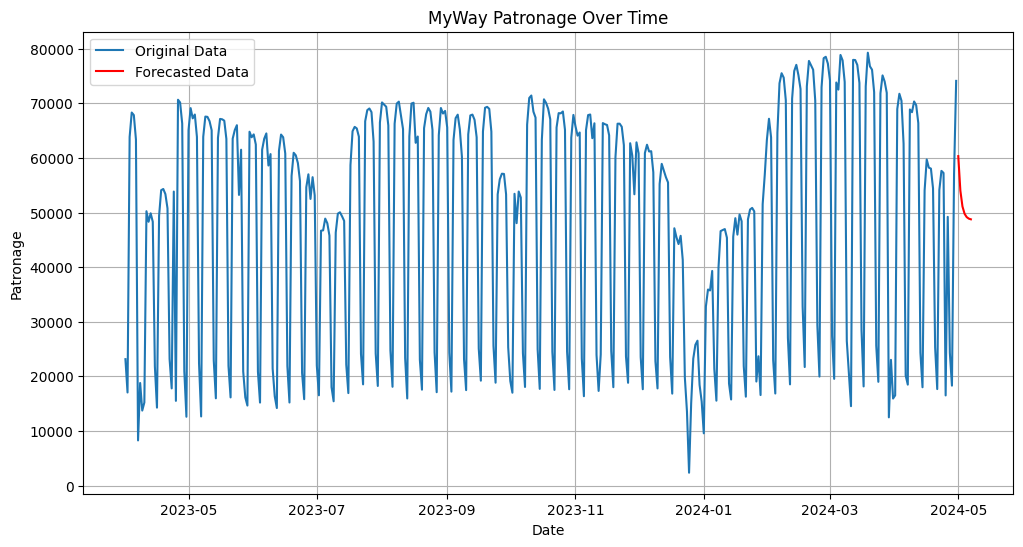

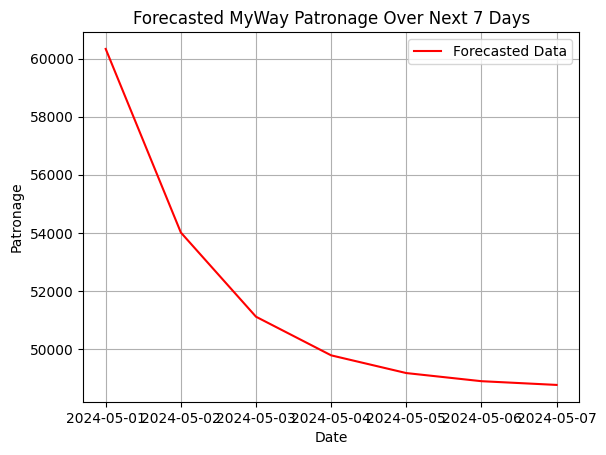

In [111]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
data = pd.read_csv(r"C:\Users\Ahile\Downloads\hand-gesture-recognition-mediapipe-main\hand-gesture-recognition-mediapipe-main\filtered_data.csv")

data['Date'] = pd.to_datetime(data['Date'])
data = data.sort_values('Date')
data.set_index('Date', inplace=True)


forecast_period_start = '2024-05-01'
forecast_period_end = '2024-05-07'


forecast_data = data.loc[forecast_period_start:forecast_period_end]

myway_data = data['MyWay']


order = (1, 1, 1)
model = ARIMA(myway_data, order=order)
fitted_model = model.fit()

# Forecast patronage for the next 7 days
forecast_results = fitted_model.forecast(steps=7)

print("Forecasted patronage for the next 7 days:")
print(forecast_results)

plt.figure(figsize=(12, 6))

plt.plot(data.index, data['MyWay'], label='Original Data')


forecast_index = pd.date_range(start=forecast_period_start, end=forecast_period_end)
plt.plot(forecast_index, forecast_results, color='red', label='Forecasted Data')

plt.title('MyWay Patronage Over Time')
plt.xlabel('Date')
plt.ylabel('Patronage')
plt.legend()
plt.grid(True)
plt.show()

forecast_index = pd.date_range(start=forecast_period_start, end=forecast_period_end)
plt.plot(forecast_index, forecast_results, color='red', label='Forecasted Data')

plt.title('Forecasted MyWay Patronage Over Next 7 Days')
plt.xlabel('Date')
plt.ylabel('Patronage')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np

actual_values = [64317, 62459, 20863, 15192, 61510, 63528, 64497]

predicted_values = [60334.709928, 54011.961202, 51111.764585, 49781.466516, 49171.268937, 48891.375962, 48762.991189]

mae = np.mean(np.abs(np.array(actual_values) - np.array(predicted_values)))

mse = np.mean((np.array(actual_values) - np.array(predicted_values))**2)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((np.array(actual_values) - np.array(predicted_values)) / np.array(actual_values))) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 17139.560554714288
Mean Squared Error (MSE): 401809161.74173266
Root Mean Squared Error (RMSE): 20045.178017212336
Mean Absolute Percentage Error (MAPE): 65.69711698745222


In [134]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load the dataset
data = pd.read_csv(r"C:\Users\Ahile\Downloads\hand-gesture-recognition-mediapipe-main\hand-gesture-recognition-mediapipe-main\filtered___data.csv")

# Extract the 'MyWay' column
myway_data = data['MyWay'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(myway_data)

# Prepare the data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 7
X, y = create_sequences(scaled_data, seq_length)

# Reshape input to be [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X, y, epochs=100, batch_size=32, verbose=1)

# Generate predictions for the next 7 days
last_sequence = scaled_data[-seq_length:]
predicted_values = []
for _ in range(7):
    prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
    predicted_values.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction[0, 0])

# Inverse scaling
predicted_values = scaler.inverse_transform(np.array(predicted_values).reshape(-1, 1))

# Print the predicted values
print("Predicted MyWay values for the next 7 days:")
for i, value in enumerate(predicted_values, 1):
    print(f"Day {i}: {value[0]}")


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.3371
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3121
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2885
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2665
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.2459
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 0.2268
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 0.2092
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.1931
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 0.1785
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1654
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1539
Epoch 12/100
1/1 [==============================] - 0s 5ms/step - loss: 0.1441
Epoch 13/100
1/1 [==============================] - 0s 5ms/ste

In [135]:
import numpy as np

actual_values = [64317, 62459, 20863, 15192, 61510, 63528, 64497]

predicted_values = [38366.1484375, 38964.0234375, 40582.94140625, 39637.97265625, 38168.92578125, 36447.625, 37040.44140625]


mae = np.mean(np.abs(np.array(actual_values) - np.array(predicted_values)))

mse = np.mean((np.array(actual_values) - np.array(predicted_values))**2)

rmse = np.sqrt(mse)

mape = np.mean(np.abs((np.array(actual_values) - np.array(predicted_values)) / np.array(actual_values))) * 100

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)

Mean Absolute Error (MAE): 24498.535714285714
Mean Squared Error (MSE): 606279622.0436052
Root Mean Squared Error (RMSE): 24622.746029710113
Mean Absolute Percentage Error (MAPE): 65.22058870981297


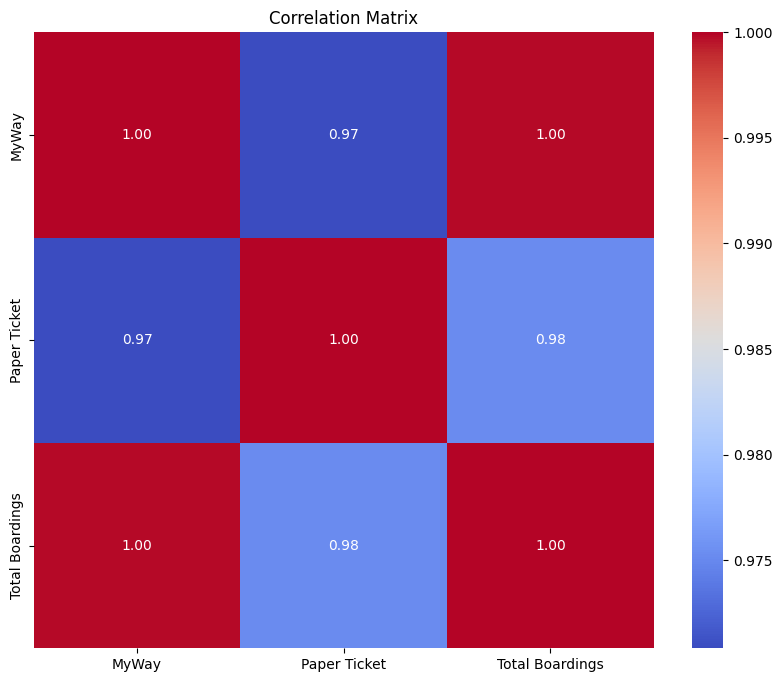

In [138]:
# Exclude the 'Date' column before calculating the correlation matrix
numeric_data = data.select_dtypes(include=np.number)
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
